# Text Data Loading, Creating a DataFrame

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import os
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
# Import csv file into a dataframe
df_hourly = pd.read_csv('./Resources/Hourly_Data_by_year.csv')

In [4]:
# convert the timezone to CST
df_hourly['Datetime'] = pd.to_datetime(df_hourly['Datetime'], utc=True)
df_hourly['Datetime'] = pd.DatetimeIndex(df_hourly['Datetime']).tz_convert('US/Central')
# rename the column 'Datetime'
df_hourly = df_hourly.rename(columns = {'Datetime':'date'})

In [5]:
df_hourly.head()

date       Open       High        Low      Close  Adj Close   Volume
0 2018-10-22 08:30:00-05:00  52.190998  52.190998  50.548500  50.889999  50.889999  1606345
1 2018-10-22 09:30:00-05:00  50.928001  51.806000  50.857998  51.431999  51.431999   983531
2 2018-10-22 10:30:00-05:00  51.415001  51.772999  51.088001  51.220001  51.220001   628777
3 2018-10-22 11:30:00-05:00  51.258003  51.779999  51.258003  51.414001  51.414001   374134
4 2018-10-22 12:30:00-05:00  51.434002  52.152000  51.318001  51.382000  51.382000   554312

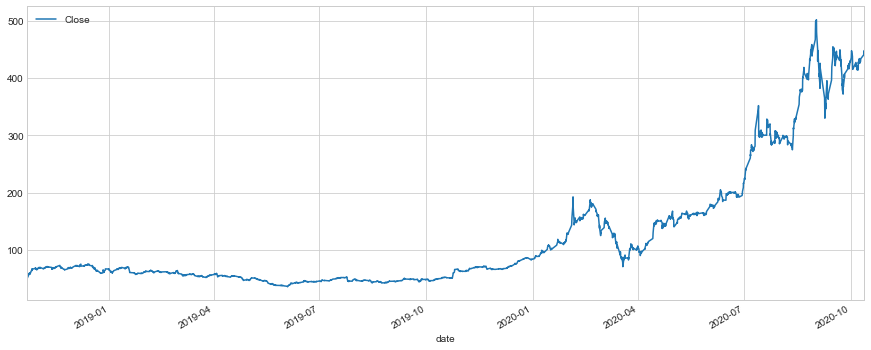

In [6]:
df_hourly.plot(x='date', y='Close', figsize=(15,6));

In [7]:
# # Import csv file into a dataframe
# df_daily = pd.read_csv('./Resources/Daily_trading_data.txt', sep=',')

In [8]:
# df_daily.head()

In [9]:
# # parsing the dates into datetime and changing the format.
# df_daily['Date'] = pd.to_datetime(df_daily['Date']).dt.date
# # rename the column
# df_daily= df_daily.rename(columns ={'Date':'date'})

In [10]:
# df_daily.plot(x='date', y='Close', figsize=(15,5));

In [11]:
# Import a text file to analyze
df_tsla = pd.read_csv('./Resources/concat_query_tesla_price_final.csv')
df_tsla.head()

date                                               text  Subjectivity  Polarity  Analysis
0  2020-10-13 14:26:07-05:00  why get a model s perf to drive around alone w...      0.750000  0.450000  Positive
1  2020-10-13 14:20:59-05:00  on ann: nhtsa probes fires in certain chevy bo...      0.512987  0.175325  Positive
2  2020-10-13 14:20:53-05:00  would love a tesla. out of my price range atm ...      0.600000  0.500000  Positive
3  2020-10-13 14:12:40-05:00  tesla cuts model s price by $3,000 amid sales ...      0.000000  0.000000   Neutral
4  2020-10-13 14:07:47-05:00  i hate days like this, where my tesla news fee...      0.500000 -0.205000  Negative

In [12]:
df_tsla['date'] = pd.to_datetime(df_tsla['date'], utc=True)
df_tsla['date'] = pd.DatetimeIndex(df_tsla['date']).tz_convert('US/Central')

In [13]:
df_tsla = df_tsla.sort_values('date', ascending = True)
df_tsla = df_tsla.reset_index(drop=True)
df_tsla.head()

date                                               text  Subjectivity  Polarity  Analysis
0 2020-05-01 00:00:37-05:00  being in the s&p means s&p index stock funds *...          0.15      -0.2  Negative
1 2020-05-01 00:05:33-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral
2 2020-05-01 00:07:22-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral
3 2020-05-01 00:30:45-05:00  tesla vp explains why china-made model 3 drops...          0.00       0.0   Neutral
4 2020-05-01 00:31:01-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral

## Labelling price increase or decrease by interval

In [14]:
# df_daily['daily return'] = df_daily['Close'].pct_change()
df_hourly['hourly return'] = df_hourly['Close'].pct_change()

In [18]:
# dropping dates before 2020-04-30
df_hourly = df_hourly[df_hourly['date'] > '2020-04-30']

In [19]:
df_hourly.head()

date        Open        High         Low       Close   Adj Close   Volume  hourly return
2657 2020-04-30 08:30:00-05:00  171.037994  173.964005  165.649994  167.694000  167.694000  7879683       0.048284
2658 2020-04-30 09:30:00-05:00  167.757996  168.220001  162.386002  165.144577  165.144577  4202242      -0.015203
2659 2020-04-30 10:30:00-05:00  165.189468  166.858002  164.199997  164.380005  164.380005  2200198      -0.004630
2660 2020-04-30 11:30:00-05:00  164.343994  164.600006  157.399994  157.552002  157.552002  3460202      -0.041538
2661 2020-04-30 12:30:00-05:00  157.552002  159.197998  153.000000  154.054016  154.054016  4656504      -0.022202

In [20]:
# Or add a column with binary number.
def getBinary(score):
    if score <= 0:
        return 0
    else:
        return 1

df_hourly['tick'] = df_hourly['hourly return'].apply(getBinary)
df_hourly.head(10)

date        Open        High         Low       Close   Adj Close   Volume  hourly return  tick
2657 2020-04-30 08:30:00-05:00  171.037994  173.964005  165.649994  167.694000  167.694000  7879683       0.048284     1
2658 2020-04-30 09:30:00-05:00  167.757996  168.220001  162.386002  165.144577  165.144577  4202242      -0.015203     0
2659 2020-04-30 10:30:00-05:00  165.189468  166.858002  164.199997  164.380005  164.380005  2200198      -0.004630     0
2660 2020-04-30 11:30:00-05:00  164.343994  164.600006  157.399994  157.552002  157.552002  3460202      -0.041538     0
2661 2020-04-30 12:30:00-05:00  157.552002  159.197998  153.000000  154.054016  154.054016  4656504      -0.022202     0
2662 2020-04-30 13:30:00-05:00  154.056000  158.399994  152.699997  157.804001  157.804001  3180325       0.024342     1
2663 2020-04-30 14:30:00-05:00  157.828003  158.695999  155.199997  156.498001  156.498001  2063202      -0.008276     0
2664 2020-05-01 08:30:00-05:00  150.824005  154.554001  148.318024  152.372528  152.372528  4569225      -0.026361     0
2665 2020-05-01 09:30:00-05:00  152.335678  153.889999  143.529007  146.451202  146.451202  6130644      -0.038861     0
2666 2020-05-01 10:30:00-05:00  146.449997  146.644806  136.608002  142.300003  142.300003  9445744      -0.028345     0

In [21]:
df_hourly['date only'] = df_hourly['date'].dt.date
# df_hourly['year'] = df_hourly['date'].dt.year
# df_hourly['month'] = df_hourly['date'].dt.month
# df_hourly['day'] = df_hourly['date'].dt.day
df_hourly['hour'] = df_hourly['date'].dt.hour
# df_hourly['minute'] = df_hourly['date'].dt.minute

In [22]:
df_hourly

date        Open        High         Low       Close   Adj Close    Volume  hourly return  tick   date only  hour
2657 2020-04-30 08:30:00-05:00  171.037994  173.964005  165.649994  167.694000  167.694000   7879683       0.048284     1  2020-04-30     8
2658 2020-04-30 09:30:00-05:00  167.757996  168.220001  162.386002  165.144577  165.144577   4202242      -0.015203     0  2020-04-30     9
2659 2020-04-30 10:30:00-05:00  165.189468  166.858002  164.199997  164.380005  164.380005   2200198      -0.004630     0  2020-04-30    10
2660 2020-04-30 11:30:00-05:00  164.343994  164.600006  157.399994  157.552002  157.552002   3460202      -0.041538     0  2020-04-30    11
2661 2020-04-30 12:30:00-05:00  157.552002  159.197998  153.000000  154.054016  154.054016   4656504      -0.022202     0  2020-04-30    12
2662 2020-04-30 13:30:00-05:00  154.056000  158.399994  152.699997  157.804001  157.804001   3180325       0.024342     1  2020-04-30    13
2663 2020-04-30 14:30:00-05:00  157.828003  158.695999  155.199997  156.498001  156.498001   2063202      -0.008276     0  2020-04-30    14
2664 2020-05-01 08:30:00-05:00  150.824005  154.554001  148.318024  152.372528  152.372528   4569225      -0.026361     0  2020-05-01     8
2665 2020-05-01 09:30:00-05:00  152.335678  153.889999  143.529007  146.451202  146.451202   6130644      -0.038861     0  2020-05-01     9
2666 2020-05-01 10:30:00-05:00  146.449997  146.644806  136.608002  142.300003  142.300003   9445744      -0.028345     0  2020-05-01    10
2667 2020-05-01 11:30:00-05:00  142.256012  144.442001  139.421997  142.477005  142.477005   4216378       0.001244     1  2020-05-01    11
2668 2020-05-01 12:30:00-05:00  142.453003  143.076004  139.399994  142.520996  142.520996   3271628       0.000309     1  2020-05-01    12
2669 2020-05-01 13:30:00-05:00  142.528763  142.528763  140.550003  141.537994  141.537994   2333074      -0.006897     0  2020-05-01    13
2670 2020-05-01 14:30:00-05:00  141.569992  141.619995  139.557602  140.261993  140.261993   2084731      -0.009015     0  2020-05-01    14
2671 2020-05-04 08:30:00-05:00  140.199997  149.759995  139.600006  147.701202  147.701202   7246927       0.053038     1  2020-05-04     8
2672 2020-05-04 09:30:00-05:00  147.595993  149.410004  146.502411  147.601440  147.601440   2308587      -0.000675     0  2020-05-04     9
2673 2020-05-04 10:30:00-05:00  147.582016  149.329987  147.503998  148.399994  148.399994   1673886       0.005410     1  2020-05-04    10
2674 2020-05-04 11:30:00-05:00  148.488007  148.488007  145.407990  146.506012  146.506012   1511727      -0.012763     0  2020-05-04    11
2675 2020-05-04 12:30:00-05:00  146.480011  148.949936  146.295990  148.562195  148.562195   1780577       0.014035     1  2020-05-04    12
2676 2020-05-04 13:30:00-05:00  148.557999  150.321991  147.550003  150.003143  150.003143   2265839       0.009699     1  2020-05-04    13
2677 2020-05-04 14:30:00-05:00  149.975998  152.399994  149.720001  152.242004  152.242004   1975594       0.014925     1  2020-05-04    14
2678 2020-05-05 08:30:00-05:00  157.816010  159.783997  154.000000  154.475662  154.475662   6165616       0.014672     1  2020-05-05     8
2679 2020-05-05 09:30:00-05:00  154.475632  156.279999  152.436005  154.404037  154.404037   3127698      -0.000464     0  2020-05-05     9
2680 2020-05-05 10:30:00-05:00  154.477982  156.175995  154.243988  154.593994  154.593994   1385886       0.001230     1  2020-05-05    10
2681 2020-05-05 11:30:00-05:00  154.589996  155.759995  153.824066  154.601761  154.601761   1374360       0.000050     1  2020-05-05    11
2682 2020-05-05 12:30:00-05:00  154.641998  155.916000  154.259995  155.500031  155.500031   1099071       0.005810     1  2020-05-05    12
2683 2020-05-05 13:30:00-05:00  155.557999  157.242004  154.641998  154.905518  154.905518   1937629      -0.003823     0  2020-05-05    13
2684 2020-05-05 14:30:00-05:00  154.844772  155.029984  152.800003  153.612000  153.612000   1634615      

### Text dataframe processing

In [23]:
df_tsla['date only'] = df_tsla['date'].dt.date
# df_elon['year'] = df_elon['date'].dt.year
# df_elon['month'] = df_elon['date'].dt.month
# df_elon['day'] = df_elon['date'].dt.day
df_tsla['hour'] = df_tsla['date'].dt.hour
# df_elon['minute'] = df_elon['date'].dt.minute
# df_elon_g = df_elon.groupby([df_elon.year, df_elon.month, df_elon.day, df_elon.hour]).all()
# df_elon_g = df_elon.resample('1H', on='date').showall()

In [24]:
df_tsla

date                                               text  Subjectivity      Polarity  Analysis   date only  hour
0     2020-05-01 00:00:37-05:00  being in the s&p means s&p index stock funds *...      0.150000 -2.000000e-01  Negative  2020-05-01     0
1     2020-05-01 00:05:33-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     0
2     2020-05-01 00:07:22-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     0
3     2020-05-01 00:30:45-05:00  tesla vp explains why china-made model 3 drops...      0.000000  0.000000e+00   Neutral  2020-05-01     0
4     2020-05-01 00:31:01-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     0
5     2020-05-01 00:32:46-05:00  tesla vp explains why china-made model 3 drops...      0.000000  0.000000e+00   Neutral  2020-05-01     0
6     2020-05-01 00:36:43-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     0
7     2020-05-01 00:40:00-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     0
8     2020-05-01 00:40:56-05:00           when does this price drop reach america?      0.000000  0.000000e+00   Neutral  2020-05-01     0
9     2020-05-01 01:01:02-05:00  "the entrepreneur receives no standard salary ...      0.000000  0.000000e+00   Neutral  2020-05-01     1
10    2020-05-01 01:11:13-05:00  @growth >> tesla cuts price for china-made mod...      0.000000  0.000000e+00   Neutral  2020-05-01     1
11    2020-05-01 01:15:41-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     1
12    2020-05-01 01:28:30-05:00  tesla confirms self-driving as a subscription ...      0.000000  0.000000e+00   Neutral  2020-05-01     1
13    2020-05-01 01:30:16-05:00  he rates shares the equivalent of sell, but he...      0.000000  0.000000e+00   Neutral  2020-05-01     1
14    2020-05-01 01:36:30-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     1
15    2020-05-01 01:37:56-05:00  tesla china lowers model 3 sr+ price to qualif...      0.454545  1.363636e-01  Positive  2020-05-01     1
16    2020-05-01 01:41:33-05:00  tesla (tsla) price target raised to $939 by pi...      0.000000  0.000000e+00   Neutral  2020-05-01     1
17    2020-05-01 01:54:07-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     1
18    2020-05-01 01:55:47-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     1
19    2020-05-01 02:00:02-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     2
20    2020-05-01 02:01:04-05:00  i love @tesla. i don get their stock price. we...      0.305102  9.438776e-02  Positive  2020-05-01     2
21    2020-05-01 02:03:11-05:00  rt "tesla net income, millions...\n'20: 16\n'1...      0.000000  0.000000e+00   Neutral  2020-05-01     2
22    2020-05-01 02:13:11-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     2
23    2020-05-01 02:20:19-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     2
24    2020-05-01 02:27:34-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     2
25    2020-05-01 02:30:35-05:00  these tesla model 3 floor mats offer a lot for...      0.000000  0.000000e+00   Neutral  2020-05-01     2
26    2020-05-01 02:32:09-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     2
27    2020-05-01 02:32:28-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01   

## Merging Dataframes

In [25]:
# Merging the dataframes by using reduce function
from functools import reduce
data_frames = [df_tsla, df_hourly]
df = reduce(lambda  left,right: pd.merge(left,right,on=['date only', 'hour'],
                                            how='outer'), data_frames)
df

date_x                                               text  Subjectivity      Polarity  Analysis   date only  hour                    date_y        Open        High         Low       Close   Adj Close      Volume  hourly return  tick
0     2020-05-01 00:00:37-05:00  being in the s&p means s&p index stock funds *...      0.150000 -2.000000e-01  Negative  2020-05-01     0                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
1     2020-05-01 00:05:33-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     0                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
2     2020-05-01 00:07:22-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     0                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
3     2020-05-01 00:30:45-05:00  tesla vp explains why china-made model 3 drops...      0.000000  0.000000e+00   Neutral  2020-05-01     0                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
4     2020-05-01 00:31:01-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     0                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
5     2020-05-01 00:32:46-05:00  tesla vp explains why china-made model 3 drops...      0.000000  0.000000e+00   Neutral  2020-05-01     0                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
6     2020-05-01 00:36:43-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     0                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
7     2020-05-01 00:40:00-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     0                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
8     2020-05-01 00:40:56-05:00           when does this price drop reach america?      0.000000  0.000000e+00   Neutral  2020-05-01     0                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
9     2020-05-01 01:01:02-05:00  "the entrepreneur receives no standard salary ...      0.000000  0.000000e+00   Neutral  2020-05-01     1                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
10    2020-05-01 01:11:13-05:00  @growth >> tesla cuts price for china-made mod...      0.000000  0.000000e+00   Neutral  2020-05-01     1                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
11    2020-05-01 01:15:41-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     1                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
12    2020-05-01 01:28:30-05:00  tesla confirms self-driving as a subscription ...      0.000000  0.000000e+00   Neutral  2020-05-01     1                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
13    2020-05-01 01:30:16-05:00  he rates shares the equivalent of sell, but he...      0.000000  0.000000e+00   Neutral  2020-05-01     1                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
14    2020-05-01 01:36:30-05:00  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral  2020-05-01     1                 

In [27]:
# Drop unnecessary columns
df = df.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Volume'])

KeyError: "['Open' 'High' 'Low' 'Volume' 'Adj Close' 'Volume'] not found in axis"

In [28]:
df['date only'] = pd.to_datetime(df['date only'])

In [29]:
df = df[['date only', 'hour', 'Close', 'hourly return', 'tick','text', 'Subjectivity', 'Polarity', 'Analysis', 'date_x','date_y']]

In [30]:
df = df.sort_values(['date only', 'hour'], ascending=True)

In [31]:
df

date only  hour       Close  hourly return  tick                                               text  Subjectivity      Polarity  Analysis                    date_x                    date_y
41430 2020-04-30     8  167.694000       0.048284   1.0                                                NaN           NaN           NaN       NaN                       NaT 2020-04-30 08:30:00-05:00
41431 2020-04-30     9  165.144577      -0.015203   0.0                                                NaN           NaN           NaN       NaN                       NaT 2020-04-30 09:30:00-05:00
41432 2020-04-30    10  164.380005      -0.004630   0.0                                                NaN           NaN           NaN       NaN                       NaT 2020-04-30 10:30:00-05:00
41433 2020-04-30    11  157.552002      -0.041538   0.0                                                NaN           NaN           NaN       NaN                       NaT 2020-04-30 11:30:00-05:00
41434 2020-04-30    12  154.054016      -0.022202   0.0                                                NaN           NaN           NaN       NaN                       NaT 2020-04-30 12:30:00-05:00
41435 2020-04-30    13  157.804001       0.024342   1.0                                                NaN           NaN           NaN       NaN                       NaT 2020-04-30 13:30:00-05:00
41436 2020-04-30    14  156.498001      -0.008276   0.0                                                NaN           NaN           NaN       NaN                       NaT 2020-04-30 14:30:00-05:00
0     2020-05-01     0         NaN            NaN   NaN  being in the s&p means s&p index stock funds *...      0.150000 -2.000000e-01  Negative 2020-05-01 00:00:37-05:00                       NaT
1     2020-05-01     0         NaN            NaN   NaN  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral 2020-05-01 00:05:33-05:00                       NaT
2     2020-05-01     0         NaN            NaN   NaN  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral 2020-05-01 00:07:22-05:00                       NaT
3     2020-05-01     0         NaN            NaN   NaN  tesla vp explains why china-made model 3 drops...      0.000000  0.000000e+00   Neutral 2020-05-01 00:30:45-05:00                       NaT
4     2020-05-01     0         NaN            NaN   NaN  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral 2020-05-01 00:31:01-05:00                       NaT
5     2020-05-01     0         NaN            NaN   NaN  tesla vp explains why china-made model 3 drops...      0.000000  0.000000e+00   Neutral 2020-05-01 00:32:46-05:00                       NaT
6     2020-05-01     0         NaN            NaN   NaN  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral 2020-05-01 00:36:43-05:00                       NaT
7     2020-05-01     0         NaN            NaN   NaN  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral 2020-05-01 00:40:00-05:00                       NaT
8     2020-05-01     0         NaN            NaN   NaN           when does this price drop reach america?      0.000000  0.000000e+00   Neutral 2020-05-01 00:40:56-05:00                       NaT
9     2020-05-01     1         NaN            NaN   NaN  "the entrepreneur receives no standard salary ...      0.000000  0.000000e+00   Neutral 2020-05-01 01:01:02-05:00                       NaT
10    2020-05-01     1         NaN            NaN   NaN  @growth >> tesla cuts price for china-made mod...      0.000000  0.000000e+00   Neutral 2020-05-01 01:11:13-05:00                       NaT
11    2020-05-01     1         NaN            NaN   NaN  tesla cuts price for china-made model 3 cars b...      0.000000  0.000000e+00   Neutral 2020-05-01 01:15:41-05:00                       NaT
12    2020-05-01     1         NaN            NaN   NaN  tesla conf

In [27]:
# df.to_csv('./Resources/elonmusk_tweets_hourly_price.csv', index=False)

In [32]:
df_data = df.copy()

## Analysis

### Things to be considered
- What sentiment score should we use?    
  (Subjectivity or Polarity, or both combined - weighting on Polarity score with more objective one)    
- Which score value should we use to represent the same hourly(or daily) window, in case of having multiple scores?    
  (mean, count, add, take the first one or the last one, etc)   
- How to deal with texts generated off market hours including weekends?   
  (dropping them out or tagging them the same (up and down) ticker with the most recent one etc)   
 
 

### 1. Using various sentiment score(Polarity only) for all texts regardless of market hour. 

In [33]:
# take the average polarity scores in the same hour window.
df_mean = df.groupby(['date only', 'hour']).mean()
df_sum = df.groupby(['date only', 'hour']).sum()
df_count = df.groupby(['date only', 'hour']).count()
df_first = df.groupby(['date only', 'hour']).first()
df_last = df.groupby(['date only', 'hour']).last()
df_data = df_mean.copy()

In [34]:
df_data = df_data.rename(columns = {'Polarity':'polarity mean'})
df_data['polarity sum'] = df_sum['Polarity']
df_data['polarity count'] = df_count['Polarity']
df_data['polarity first'] = df_first['Polarity']
df_data['polarity last'] = df_last['Polarity']
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last
date only  hour                                                                                                                           
2020-04-30 8     167.694000       0.048284   1.0           NaN            NaN           0.0               0             NaN            NaN
           9     165.144577      -0.015203   0.0           NaN            NaN           0.0               0             NaN            NaN
           10    164.380005      -0.004630   0.0           NaN            NaN           0.0               0             NaN            NaN
           11    157.552002      -0.041538   0.0           NaN            NaN           0.0               0             NaN            NaN
           12    154.054016      -0.022202   0.0           NaN            NaN           0.0               0             NaN            NaN

In [35]:
df_data['polarity mean change'] = df_data['polarity mean'].pct_change()
df_data['polarity sum change'] = df_data['polarity sum'].pct_change()
df_data['polarity count change'] = df_data['polarity count'].pct_change()
df_data['polarity first change'] = df_data['polarity first'].pct_change()
df_data['polarity last change'] = df_data['polarity last'].pct_change()
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                          
2020-04-30 8     167.694000       0.048284   1.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           9     165.144577      -0.015203   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           10    164.380005      -0.004630   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           11    157.552002      -0.041538   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           12    154.054016      -0.022202   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN

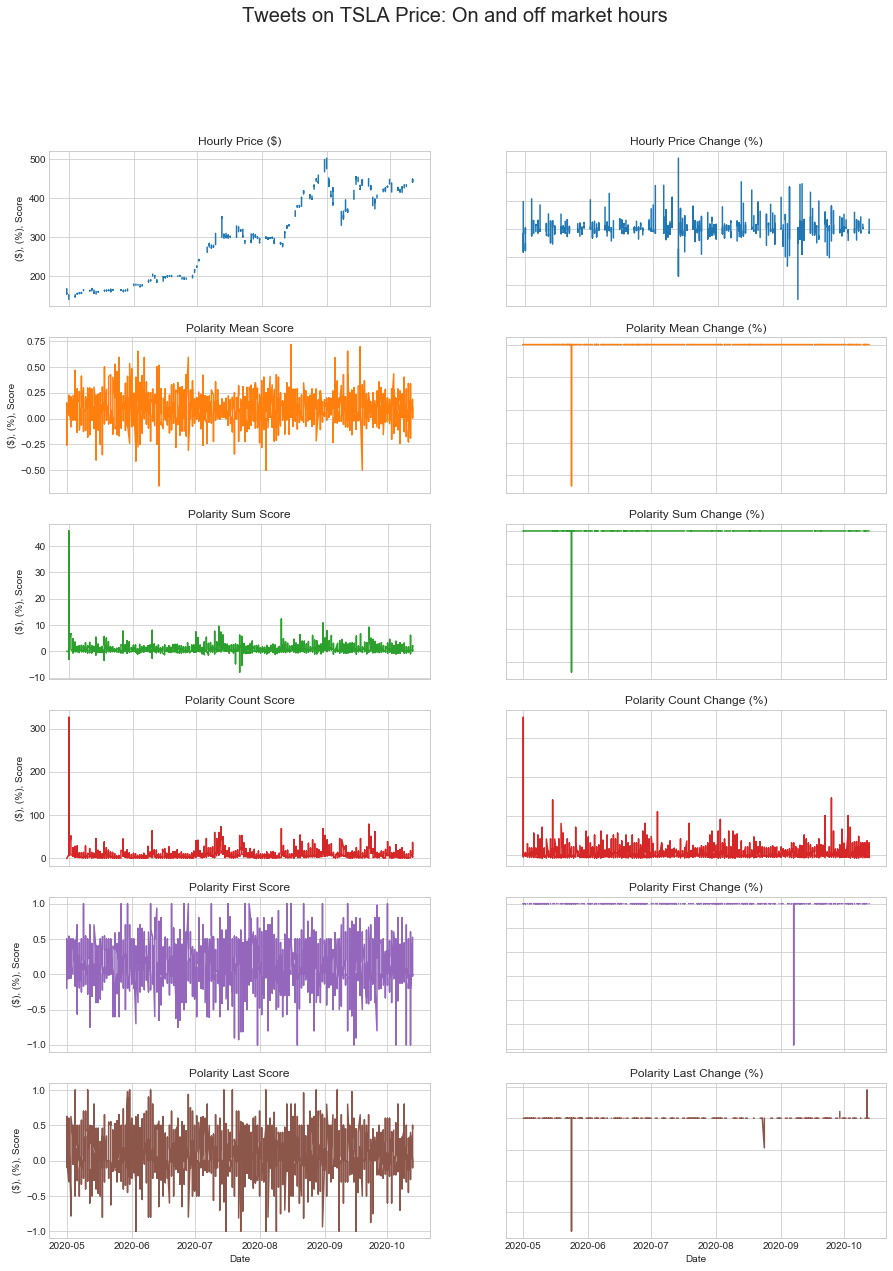

In [36]:
# plot total overviews
date_only = df_data.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price: On and off market hours', fontsize=20)

axs[0, 0].plot(date_only, df_data['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_data['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_data['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_data['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_data['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_data['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_data['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_data['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_data['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_data['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_data['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_data['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [38]:
# # plot polarity mean
# date_only = df_data.index.get_level_values(0)

# fig, ax1 = plt.subplots(figsize=(15,6))

# ax2 = ax1.twinx()
# ax1.plot(date_only, df_data['Close'], color='g')
# ax2.plot(date_only, df_data['polarity mean'], color='b', alpha=0.2)

# ax1.set_xlabel('Date')
# ax1.set_ylabel('Hourly Price ($)', color='g')
# ax2.set_ylabel('Polarity Score', color='b')
# ax1.set_xticklabels(date_only, rotation=45, size=8)

# fig.show();

In [39]:
correlation_data = df_data.corr()
correlation_data

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.018484  0.007353     -0.108524      -0.046305      0.025871        0.101535       -0.008210      -0.022147             -0.000343            -0.010486              -0.084594              -0.053187              0.056497
hourly return          0.018484       1.000000  0.604206     -0.040886       0.031639     -0.034941       -0.055695        0.001223       0.003062              0.014700             0.019297              -0.036098               0.028690              0.027580
tick                   0.007353       0.604206  1.000000      0.018343      -0.005224     -0.012274       -0.014793        0.018180      -0.028172             -0.009033             0.003101              -0.014445               0.003618              0.061057
Subjectivity          -0.108524      -0.040886  0.018343      1.000000       0.217955      0.056684       -0.043287        0.102985       0.088988             -0.017219            -0.017222               0.000175               0.002791             -0.021720
polarity mean         -0.046305       0.031639 -0.005224      0.217955       1.000000      0.350693       -0.027827        0.451512       0.455831              0.003821             0.003819               0.001763               0.003411              0.007860
polarity sum           0.025871      -0.034941 -0.012274      0.056684       0.350693      1.000000        0.821163        0.161000       0.167035              0.006921             0.006921               0.258530               0.004204              0.008054
polarity count         0.101535      -0.055695 -0.014793     -0.043287      -0.027827      0.821163        1.000000       -0.012529       0.004298              0.008332             0.008333               0.261985               0.003538              0.008493
polarity first        -0.008210       0.001223  0.018180      0.102985       0.451512      0.161000       -0.012529        1.000000       0.068247              0.017784             0.017786               0.011510               0.024833              0.019033
polarity last         -0.022147       0.003062 -0.028172      0.088988       0.455831      0.167035        0.004298        0.068247       1.000000             -0.011033            -0.011038              -0.003081              -0.026851             -0.002331
polarity mean change  -0.000343       0.014700 -0.009033     -0.017219       0.003821      0.006921        0.008332        0.017784      -0.011033              1.000000             1.000000              -0.010338               0.000632              0.938903
polarity sum change   -0.010486       0.019297  0.003101     -0.017222       0.003819      0.006921        0.008333        0.017786      -0.011038              1.000000             1.000000              -0.010338               0.000716              0.938903
polarity count change -0.084594      -0.036098 -0.014445      0.000175       0.001763      0.258530        0.261985        0.011510      -0.003081             -0.010338            -0.010338               1.000000               0.012002             -0.008177
polarity first change -0.053187       0.028690  0.003618      0.002791       0.003411      0.004204        0.003538        0.024833      -0.026851              0.000632             0.000716               0.012002               1.000000              0.000457
polarity last change   0.056497       0.027580  0.061057     -0.021720       0.007860      0.008054        0.008493        0.019033      -0.002331              0.938903             0.938903              -0.008177               0.000457              1.000000

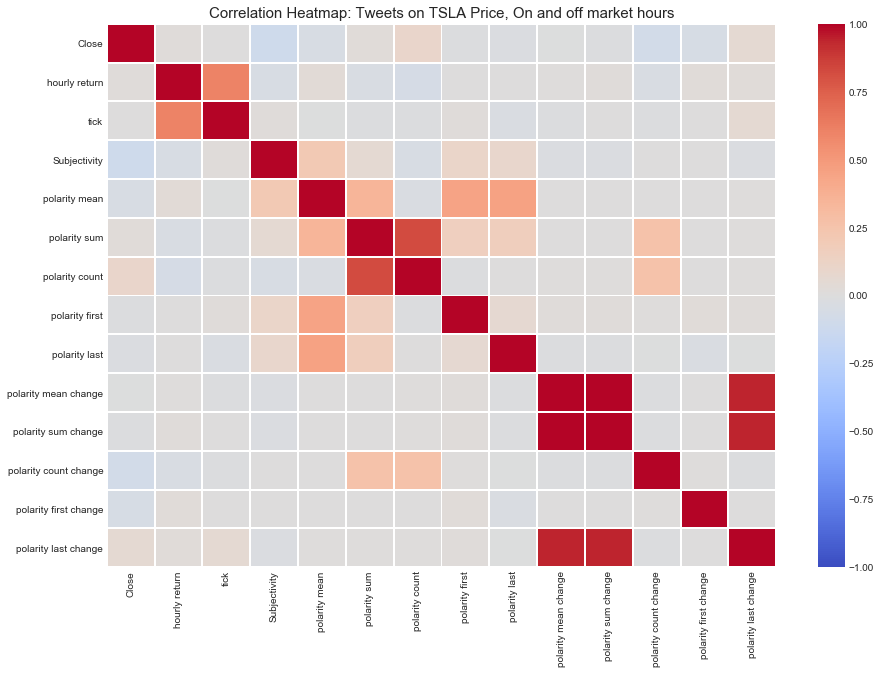

In [40]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price, On and off market hours', fontsize=15)
sns.heatmap(correlation_data, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

### 2. Using various sentiment score(Polarity only) for only the texts that matches with market hours. 

In [41]:
# Dropping unmatching rows 
df_2 = df_data.dropna()
df_2

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                          
2020-05-01 11    142.477005       0.001244   1.0      0.481859       0.133968     41.664032             311        0.265000       0.160000             -0.046701            -0.090564              -0.046012                    inf         -5.566502e-01
           12    142.520996       0.000309   1.0      0.475321       0.110764     24.921997             225        0.017500       0.130000             -0.173202            -0.401834              -0.276527              -0.933962         -1.875000e-01
           13    141.537994      -0.006897   0.0      0.487748       0.110106     16.956279             154       -0.050000       0.000000             -0.005947            -0.319626              -0.315556              -3.857143         -1.000000e+00
2020-05-04 8     147.701202       0.053038   1.0      0.325444       0.124548      2.117310              17        0.000000       0.160000              0.102627             0.338904               0.214286              -1.000000          0.000000e+00
           9     147.601440      -0.000675   0.0      0.460780       0.124733      3.492512              28        0.160000       0.500000              0.001485             0.649505               0.647059                    inf          2.125000e+00
           10    148.399994       0.005410   1.0      0.439617       0.105614      1.901044              18        0.000000       0.120000             -0.153280            -0.455680              -0.357143              -1.000000         -7.600000e-01
           11    146.506012      -0.012763   0.0      0.474592       0.069647      1.183993              17        0.108889       0.177500             -0.340552            -0.377188              -0.055556                    inf          4.791667e-01
           12    148.562195       0.014035   1.0      0.430704       0.137969      1.517661              11        0.274857       0.025000              0.980988             0.281816              -0.352941               1.524198         -8.591549e-01
           13    150.003143       0.009699   1.0      0.572639       0.197788      2.175669              11        0.002222       0.500000              0.433567             0.433567               0.000000              -0.991915          1.900000e+01
           14    152.242004       0.014925   1.0      0.444107       0.163631      1.145417               7        0.040000       0.250000             -0.172696            -0.473534              -0.363636              17.000000         -5.000000e-01
2020-05-05 8     154.475662       0.014672   1.0      0.419162       0.061391      0.920861              15       -0.011481       0.227273             -0.733873            -0.501011               0.875000                   -inf                   inf
           9     154.404037      -0.000464   0.0      0.387109      -0.006647     -0.192749              29        0.000000       0.000000             -1.108266            -1.209314               0.933333              -1.000000         -1.000000e+00
           10    154.593994       0.001230   1.0      0.394922       0.111546      1.673183              15        0.330000      -0.015909            -17.782558            -9.680634              -0.482759                    inf                  -inf
           11    154.601761       0.000050   1.0      0.464172       0.042484      0.382359               9        0.160000      -0.066667             -0.619130            -0.771478              -0.400000              -0.515152          3.190476e+00
           12    155.5

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


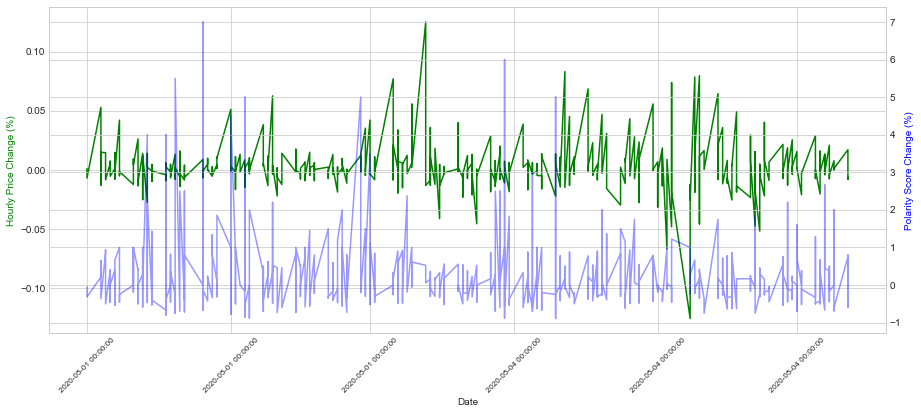

In [42]:
# plot polarity mean change vs hourly return
date_only = df_2.index.get_level_values(0)

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.plot(date_only, df_2['hourly return'], color='g')
ax2.plot(date_only, df_2['polarity count change'], color='b', alpha=0.4)

ax1.set_xlabel('Date')
ax1.set_ylabel('Hourly Price Change (%)', color='g')
ax2.set_ylabel('Polarity Score Change (%)', color='b')
ax1.set_xticklabels(date_only, rotation=45, size=8)

fig.show();

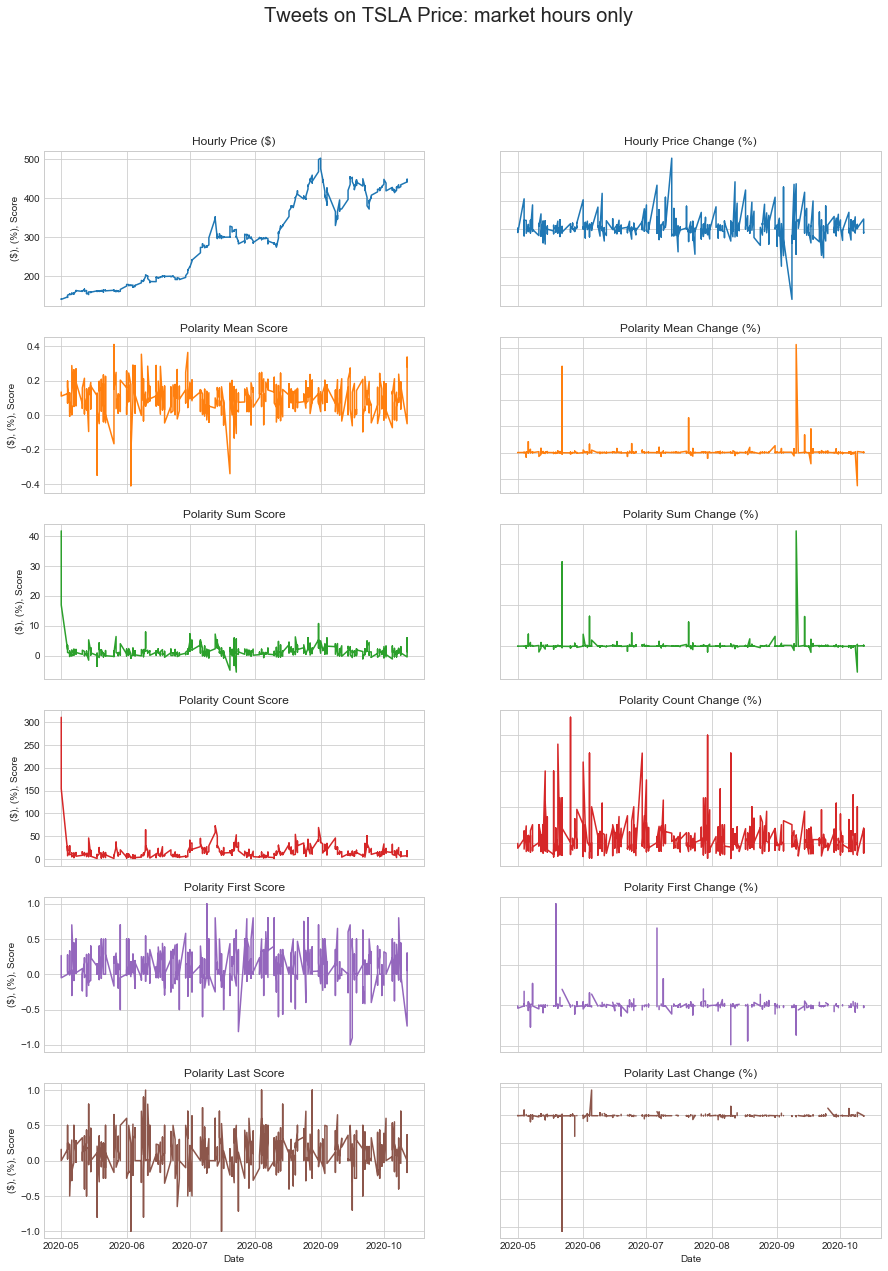

In [43]:
# plot total overviews
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price: market hours only', fontsize=20)

axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_2['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_2['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_2['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_2['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_2['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_2['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_2['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_2['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

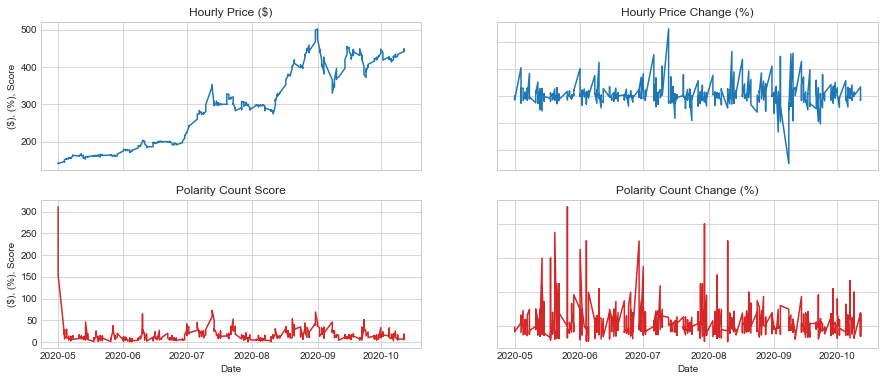

In [44]:
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(2, 2, figsize=(15,6))
axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[1, 0].set_title('Polarity Count Score')

axs[0, 1].plot(date_only, df_2['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[1, 1].set_title('Polarity Count Change (%)')


for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [45]:
correlation_2 = df_2.corr()
correlation_2

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.014216 -0.010932     -0.154621      -0.059280      0.045454        0.124610       -0.004354      -0.003919             -0.006732            -0.013201              -0.099871              -0.072290              0.053587
hourly return          0.014216       1.000000  0.594113     -0.052695       0.026919      0.015893        0.001280       -0.003080       0.009752             -0.005034             0.000867               0.030399               0.031348              0.028788
tick                  -0.010932       0.594113  1.000000      0.025123       0.002304      0.029226        0.023667        0.025352      -0.029233             -0.023208            -0.010118               0.047121               0.014128              0.059158
Subjectivity          -0.154621      -0.052695  0.025123      1.000000       0.101427      0.036144       -0.022452        0.020181       0.065646             -0.014458            -0.005733              -0.002546               0.018896             -0.031659
polarity mean         -0.059280       0.026919  0.002304      0.101427       1.000000      0.354026       -0.044565        0.296610       0.375989              0.037717             0.042132              -0.010753               0.073680              0.045997
polarity sum           0.045454       0.015893  0.029226      0.036144       0.354026      1.000000        0.850262        0.130452       0.121406              0.004220             0.009814               0.040651               0.046200              0.023049
polarity count         0.124610       0.001280  0.023667     -0.022452      -0.044565      0.850262        1.000000        0.005305       0.009373             -0.019373            -0.016650               0.041675              -0.008355              0.020267
polarity first        -0.004354      -0.003080  0.025352      0.020181       0.296610      0.130452        0.005305        1.000000       0.011877              0.009691             0.009338               0.009520               0.191727             -0.000199
polarity last         -0.003919       0.009752 -0.029233      0.065646       0.375989      0.121406        0.009373        0.011877       1.000000             -0.014593            -0.034119              -0.085159              -0.005718              0.115024
polarity mean change  -0.006732      -0.005034 -0.023208     -0.014458       0.037717      0.004220       -0.019373        0.009691      -0.014593              1.000000             0.971890               0.015523               0.003452             -0.905127
polarity sum change   -0.013201       0.000867 -0.010118     -0.005733       0.042132      0.009814       -0.016650        0.009338      -0.034119              0.971890             1.000000               0.071984               0.022061             -0.898667
polarity count change -0.099871       0.030399  0.047121     -0.002546      -0.010753      0.040651        0.041675        0.009520      -0.085159              0.015523             0.071984               1.000000              -0.026248             -0.014148
polarity first change -0.072290       0.031348  0.014128      0.018896       0.073680      0.046200       -0.008355        0.191727      -0.005718              0.003452             0.022061              -0.026248               1.000000              0.079627
polarity last change   0.053587       0.028788  0.059158     -0.031659       0.045997      0.023049        0.020267       -0.000199       0.115024             -0.905127            -0.898667              -0.014148               0.079627              1.000000

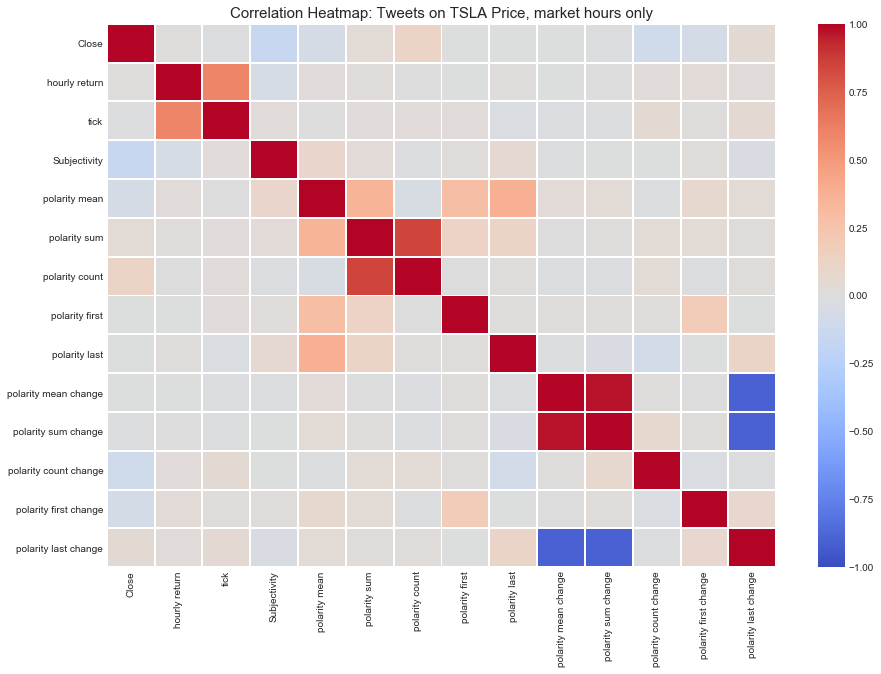

In [46]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price, market hours only', fontsize=15)
sns.heatmap(correlation_2, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');